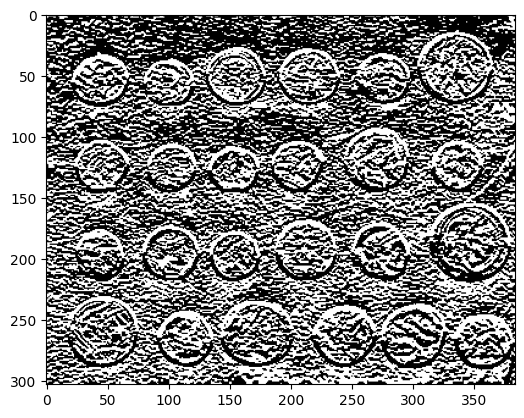

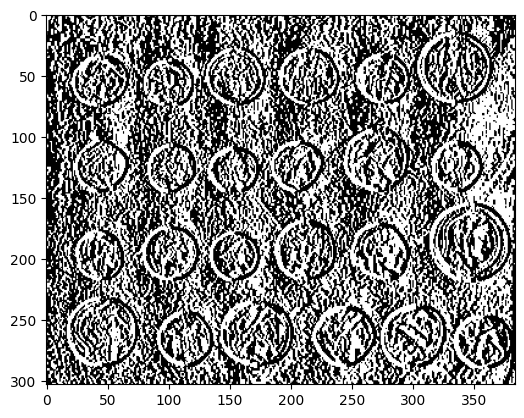

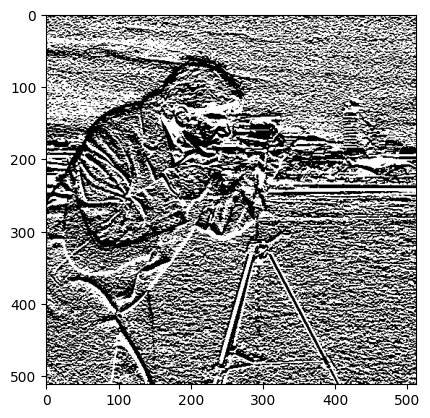

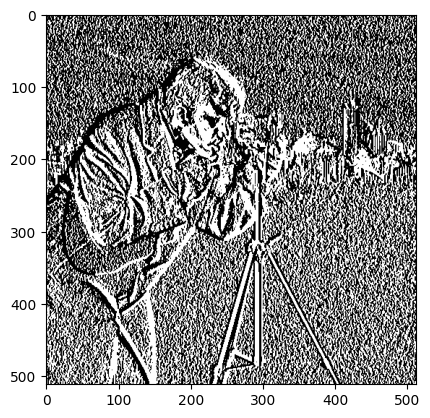

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915 - TURMA 07N 

#Exercício Gradientes 1 - Notebook 2
#Pesquise as melhores alternativas para a visualização dos filtros direcionais sobel_h e sobel_v mostrando imagens binárias.

import matplotlib.pyplot as plt
from skimage import data, filters

# Carrega uma imagem de teste
image = data.coins()

# Aplica o filtro Sobel horizontal
sobel_h = filters.sobel_h(image)
# Exibe o resultado como uma imagem binária
plt.imshow(sobel_h > 0, cmap='gray')
plt.show()

# Aplica o filtro Sobel vertical
sobel_v = filters.sobel_v(image)
# Exibe o resultado como uma imagem binária
plt.imshow(sobel_v > 0, cmap='gray')
plt.show()

from skimage import data

# Carrega a imagem cameraman
image = data.camera()

# Aplica o filtro Sobel horizontal
sobel_h = filters.sobel_h(image)
# Exibe o resultado como uma imagem binária
plt.imshow(sobel_h > 0, cmap='gray')
plt.show()

# Aplica o filtro Sobel vertical
sobel_v = filters.sobel_v(image)
# Exibe o resultado como uma imagem binária
plt.imshow(sobel_v > 0, cmap='gray')
plt.show()




Resposta: Existem diversas formas de visualizar os filtros direcionais Sobel, que são utilizados em processamento de imagens para detecção de bordas. Aqui são algumas opções:

Visualização dos filtros em escala de cinza: uma forma simples de visualizar os filtros Sobel é representá-los como imagens em escala de cinza. O filtro sobel_h pode ser exibido em uma imagem onde os valores mais claros representam os pixels com maior valor na direção horizontal, enquanto os valores mais escuros representam os pixels com menor valor na direção horizontal. O mesmo pode ser feito para o filtro sobel_v para a direção vertical.

Visualização dos filtros como mapas de calor: outra opção é exibir os filtros como mapas de calor, onde os valores mais altos são representados em uma cor quente (como vermelho) e os valores mais baixos são representados em uma cor fria (como azul). Isso permite que você visualize rapidamente as áreas onde há maior contraste na direção horizontal ou vertical.

Visualização dos filtros como imagens binárias: para visualizar os filtros diretamente como imagens binárias, você pode aplicá-los a uma imagem de teste e exibir o resultado como uma imagem binária, onde os pixels brancos indicam áreas onde o filtro detectou bordas e os pixels pretos indicam áreas onde o filtro não detectou bordas.

Visualização dos filtros como sobrepõem em uma imagem original: você pode também sobrepôr a imagem original com os filtros aplicados, para visualizar onde os filtros detectaram bordas e como isso afeta a imagem original. Isso permite que você veja como o filtro afeta diferentes áreas da imagem.

Portanto, as melhores alternativas para visualizar os filtros direcionais Sobel são: visualização em escala de cinza, mapas de calor, imagens binárias e sobrepôs em imagens originais. A escolha dependerá da aplicação específica e do que se deseja destacar na imagem.



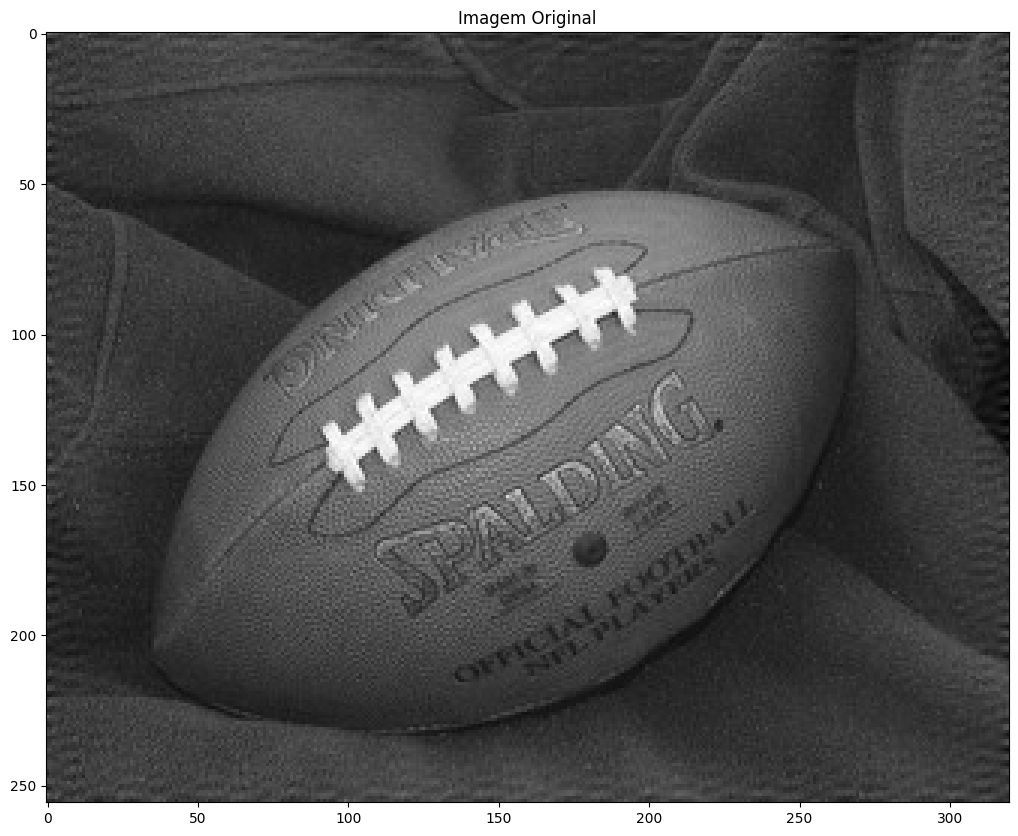

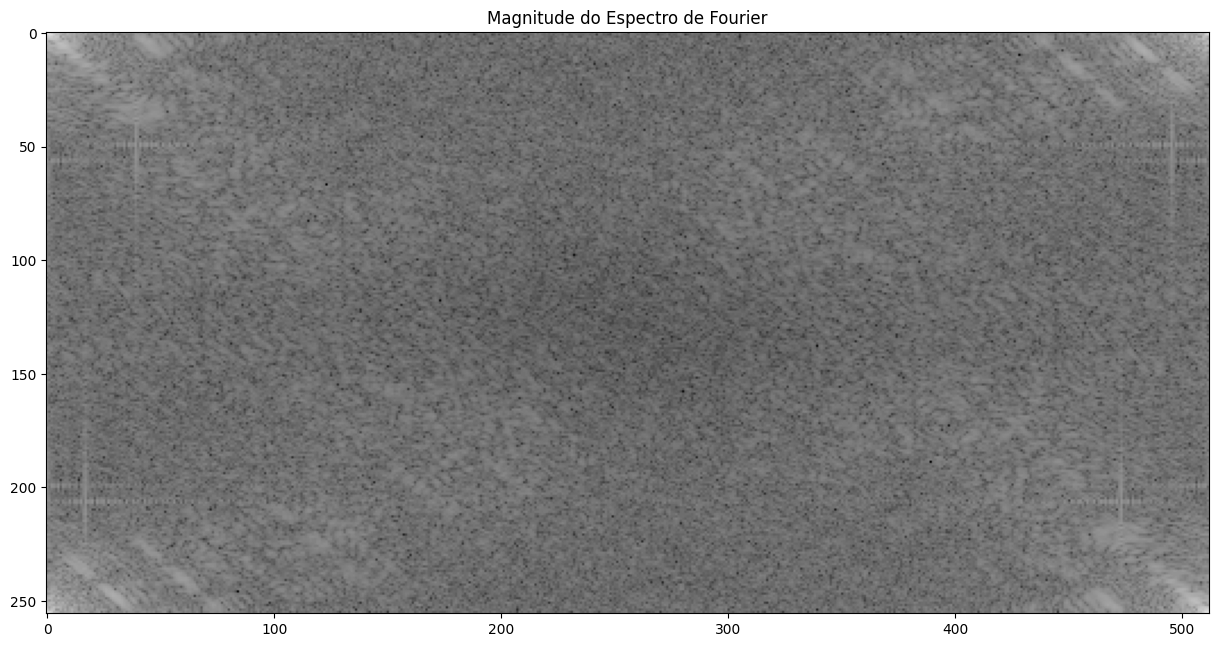

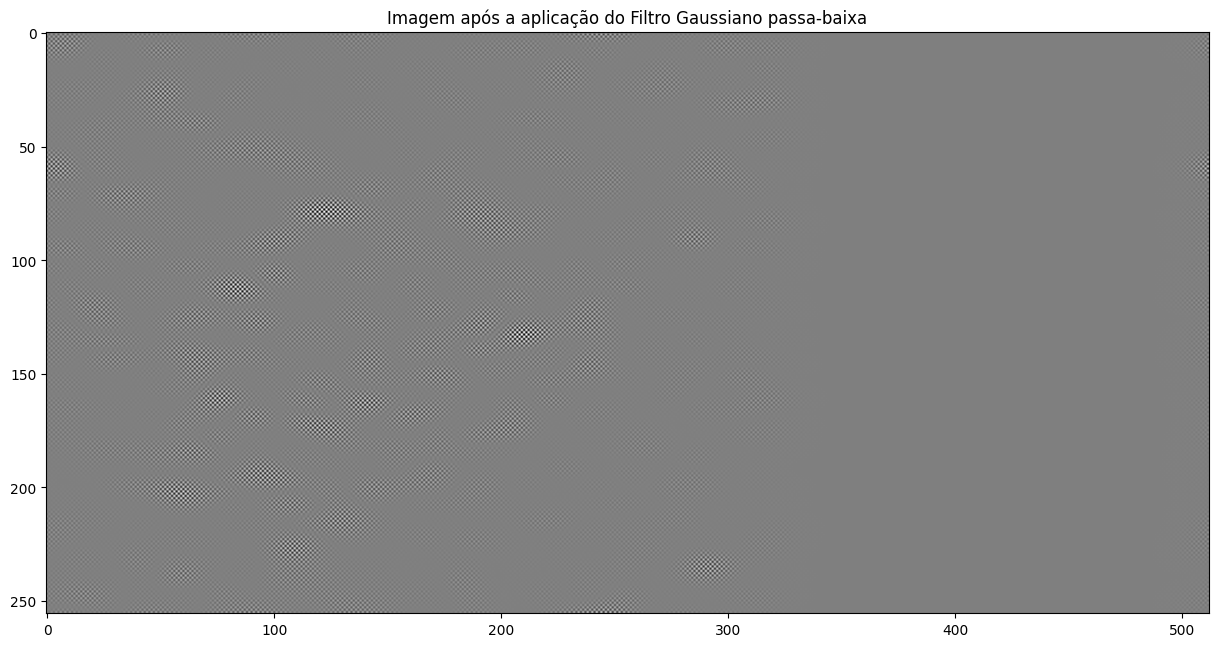

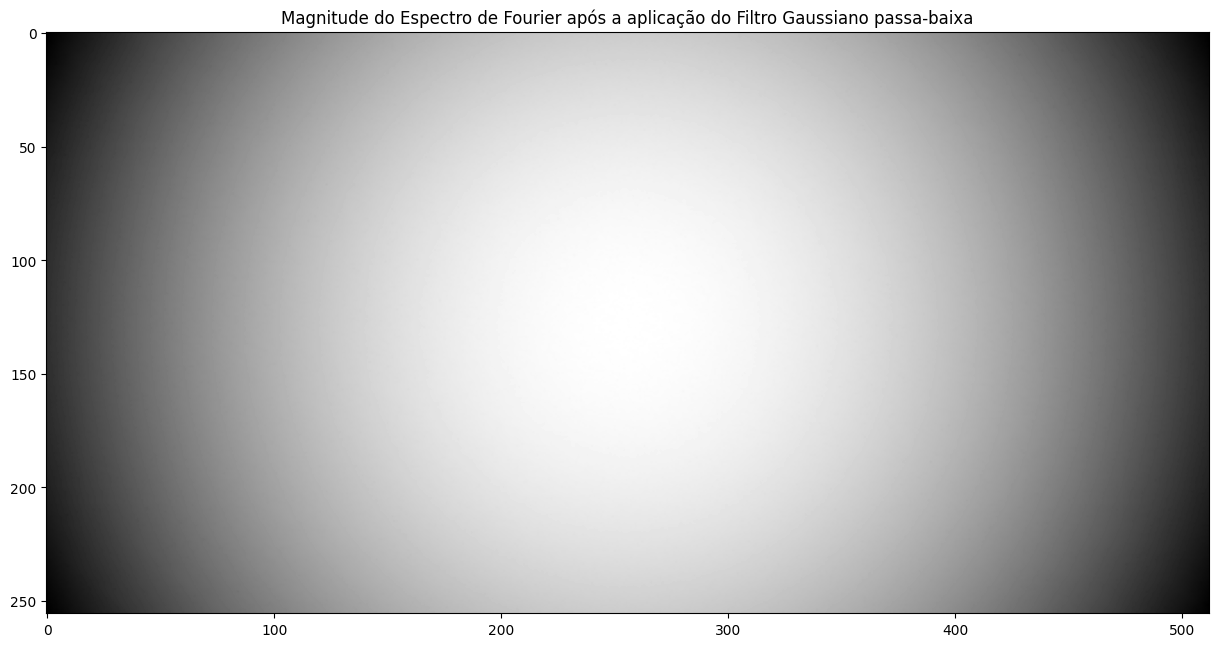

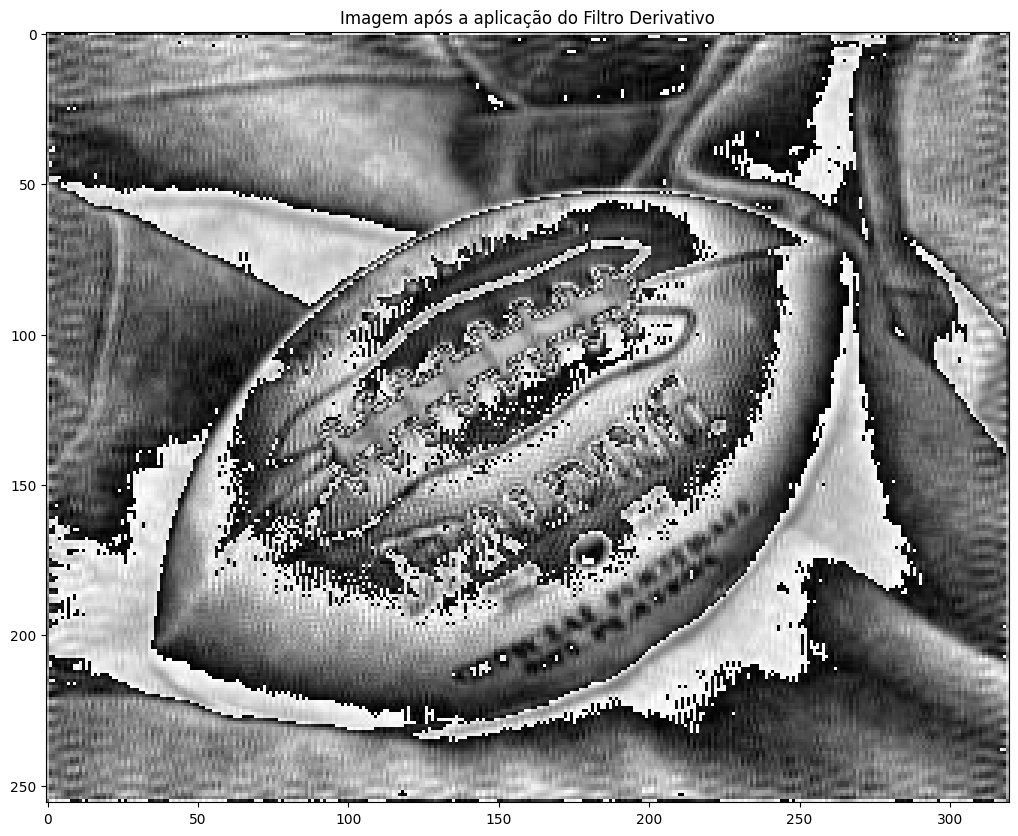

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

# Exercício Gradientes  2 - Notebook 2
#Utilize outras imagens (da Web ou do _scikit_ ) e aplique os filtros derivativos (kernel) manualmente (com a função **generic_filter()** ) para poder experimentar diversos valores de kernel.

import numpy as np
import matplotlib.pyplot as plt
from skimage import io, filters, color
from scipy.ndimage import generic_filter

# Carregando a imagem
img_url = 'https://github.com/ll-talyta-ll/C6LOGO/blob/main/fixed_football.png?raw=true'
image = io.imread(img_url, as_gray=True)

# Mostrando a imagem original
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.show()

# Calculando o tamanho necessário para o padding
h, w = image.shape
padded_h = int(2**(np.ceil(np.log2(h))))
padded_w = int(2**(np.ceil(np.log2(w))))

# Criando uma imagem quadrada preenchida com zeros e copiando a imagem original no canto superior esquerdo
padded_image = np.zeros((padded_h, padded_w))
padded_image[:h, :w] = image

# Calculando a transformada de Fourier da imagem com padding
fft = np.fft.fft2(padded_image)

# Calculando as coordenadas do centro da imagem
x, y = np.meshgrid(np.arange(padded_w), np.arange(padded_h))
center_x, center_y = padded_w/2, padded_h/2

# Aplicando um Filtro Gaussiano passa-baixa com sigma=10
sigma = 10
gaussian_filter = np.exp(-((x-center_x)**2 + (y-center_y)**2) / (2 * sigma**2))
filtered_fft = fft * gaussian_filter

# Calculando a magnitude do espectro de Fourier
fft_mag = np.abs(fft)
filtered_mag = np.abs(filtered_fft)

# Mostrando a magnitude do espectro de Fourier
plt.imshow(np.log(fft_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier')
plt.show()

# Mostrando a imagem após a aplicação do filtro
filtered_image = np.fft.ifft2(filtered_fft).real
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagem após a aplicação do Filtro Gaussiano passa-baixa')
plt.show()

# Mostrando a magnitude do espectro de Fourier após a aplicação do filtro
plt.imshow(np.log(filtered_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier após a aplicação do Filtro Gaussiano passa-baixa')
plt.show() 

# Aplicando filtro derivativo manualmente
kernel_size = 3
kernel = np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])

# Aplicando o filtro na imagem original
filtered_image = generic_filter(image, np.sum, footprint=kernel, mode='constant')

# Mostrando a imagem após a aplicação do filtro
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagem após a aplicação do Filtro Derivativo')
plt.show()

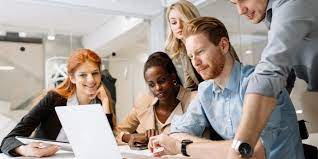

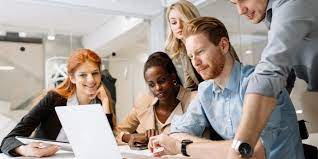

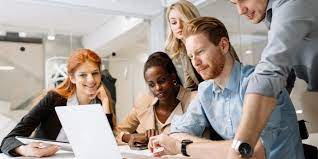

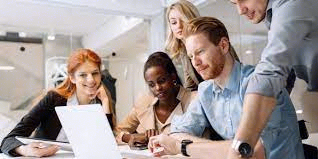

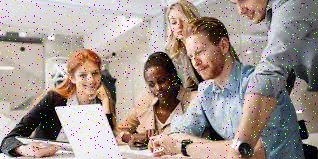

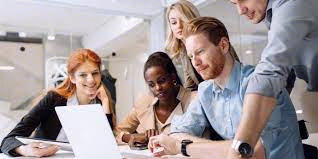

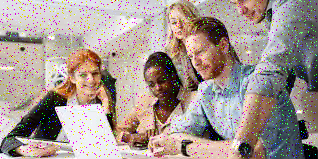

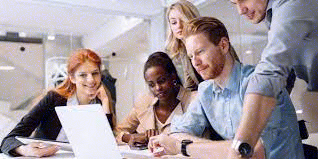

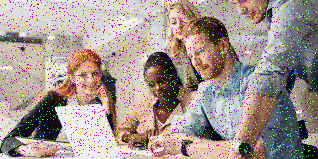

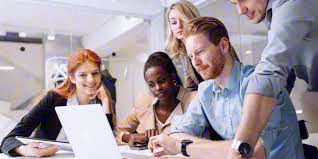

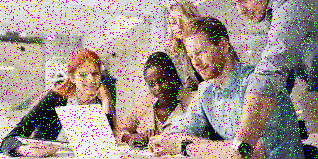

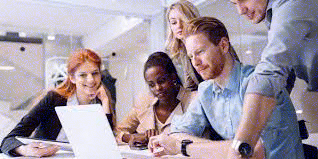

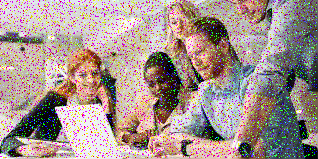

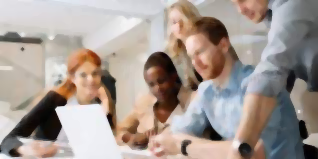

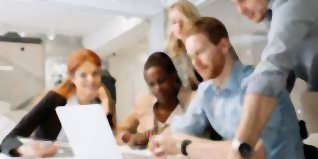

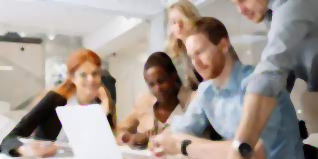

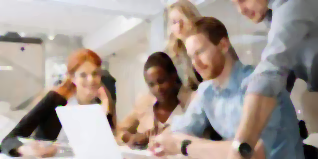

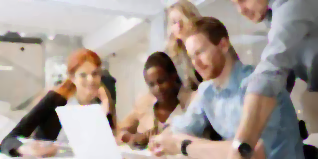

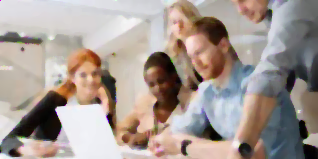

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

# Exercícios -- Suavização - Notebook 2
#1. Pegue uma imagem, adicione ruído Gaussiano e ruído sal e pimenta, e compare os efeitos do borramento (suavização) via filtros quadrado, Gaussiano e mediano para ambas as imagens conforme você muda o nível de ruído.
import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# carregar a imagem de uma URL
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-uOxBKTdLGduPxXohJ2OyC1LXsvvhzQ1yRe0qY4sTKXIHwch1LJPQJPW1onAirD34Kns&usqp=CAU"
img_response = requests.get(url)
img_array = np.array(bytearray(img_response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

# exibir a imagem original
cv2_imshow(img)

# níveis de ruído gaussiano e sal e pimenta
levels = [0, 10, 20, 30, 40, 50]

# aplicar ruído gaussiano e sal e pimenta
img_gaussian = {}
img_salt_pepper = {}
for level in levels:
  mean = 0
  std_dev = level
  noise = np.zeros(img.shape, dtype=img.dtype)
  cv2.randn(noise, mean, std_dev)
  img_gaussian[level] = cv2.add(img, noise)

  amount = level/255
  img_salt_pepper[level] = np.copy(img)
  coords_salt = [np.random.randint(0, i - 1, int(amount * img.shape[0] * img.shape[1])) for i in img.shape]
  img_salt_pepper[level][tuple(coords_salt)] = 255
  coords_pepper = [np.random.randint(0, i - 1, int(amount * img.shape[0] * img.shape[1])) for i in img.shape]
  img_salt_pepper[level][tuple(coords_pepper)] = 0

  # exibir as imagens com ruído gaussiano e sal e pimenta
  cv2_imshow(img_gaussian[level])
  cv2_imshow(img_salt_pepper[level])

# aplicar os filtros de suavização
diameter = 9
sigma_color = sigma_space = 75
kernel_size = 5

img_filtered = {}
for level in levels:
  # filtro quadrado
  img_filtered[level] = cv2.blur(img_gaussian[level], (kernel_size, kernel_size))

  # filtro gaussiano
  img_filtered[level] = cv2.GaussianBlur(img_gaussian[level], (kernel_size, kernel_size), 0)

  # filtro mediano
  img_filtered[level] = cv2.medianBlur(img_salt_pepper[level], kernel_size)

  # exibir as imagens filtradas
  cv2_imshow(img_filtered[level])

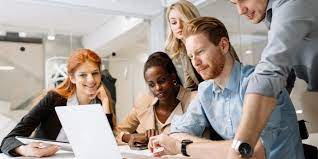

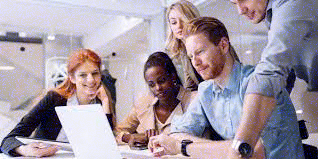

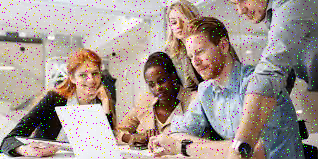

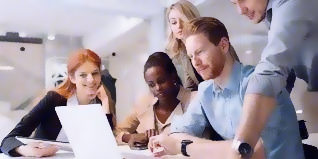

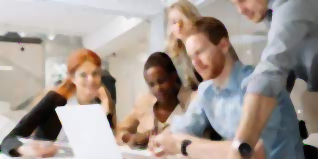

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

# Exercícios -- Suavização - Notebook 2
#2. Pegue uma imagem com detalhes finos (como a do gato e seu bigode, acima), adicione ruído Gaussiano e ruído sal e pimenta e compare os efeitos do borramento (suavização) via filtragem bilateral, gaussiana e de média (com kernel). Experimente diversos valores de sigma e tamanho do kernel para ver os resultados.

import cv2
import numpy as np
import requests
from google.colab.patches import cv2_imshow

# carregar a imagem de uma URL
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcS-uOxBKTdLGduPxXohJ2OyC1LXsvvhzQ1yRe0qY4sTKXIHwch1LJPQJPW1onAirD34Kns&usqp=CAU"
img_response = requests.get(url)
img_array = np.array(bytearray(img_response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, -1)

# exibir a imagem original
cv2_imshow(img)

# adicionar ruído gaussiano
mean = 0
std_dev = 50
noise = np.zeros(img.shape, dtype=img.dtype)
cv2.randn(noise, mean, std_dev)
img_gaussian = cv2.add(img, noise)

# exibir a imagem com ruído gaussiano
cv2_imshow(img_gaussian)

# adicionar ruído sal e pimenta
s_vs_p = 0.5
amount = 0.05
img_salt_pepper = np.copy(img)
coords_salt = [np.random.randint(0, i - 1, int(amount * img.shape[0] * img.shape[1])) for i in img.shape]
img_salt_pepper[tuple(coords_salt)] = 255
coords_pepper = [np.random.randint(0, i - 1, int(amount * img.shape[0] * img.shape[1])) for i in img.shape]
img_salt_pepper[tuple(coords_pepper)] = 0

# exibir a imagem com ruído sal e pimenta
cv2_imshow(img_salt_pepper)

# aplicar o filtro bilateral
diameter = 9
sigma_color = sigma_space = 75
img_bilateral = cv2.bilateralFilter(img_gaussian, diameter, sigma_color, sigma_space)

# exibir a imagem com o filtro bilateral aplicado
cv2_imshow(img_bilateral)

# aplicar o filtro de mediana
kernel_size = 5
img_median = cv2.medianBlur(img_salt_pepper, kernel_size)

# exibir a imagem com o filtro de mediana aplicado
cv2_imshow(img_median)


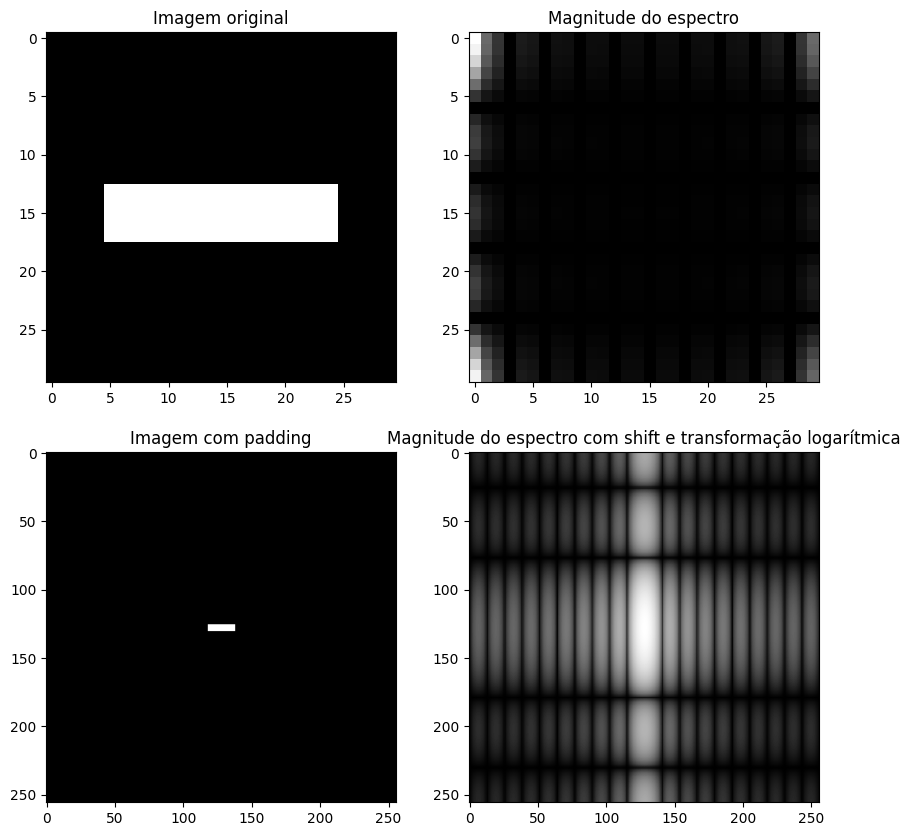

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

#Exercício 1 - NOTEBOOK 3 
#Crie uma imagem de 30x30, preenchida com zeros e depois crie um retângulo de 5:24 em x e de 13:17 em y, com valor 1.
#Depois calcule a Transformada Rápida de Fourier (fft2), e obtenha uma imagem (magnitude do espectro), conforme mostrado.
#Crie uma nova imagem adicionando zeros à imagem do retângulo (isto é chamado de padding) de modo que ela fique com tamanho 256x256 e então calcule novamente a Transformada de Fourier e comente as diferenças dos espectros.
#Agora faça um shift da Transformada, reposicionando-a, de modo que a origem fique no centro da imagem.
#Por último neste exercício, aplique uma transformação logarítmica à Transformada para mostrar mais detalhes do espectro.

import numpy as np
import matplotlib.pyplot as plt

# Criando uma imagem de 30x30 preenchida com zeros
img = np.zeros((30, 30))

# Criando um retângulo de 5:24 em x e de 13:17 em y, com valor 1
img[13:18, 5:25] = 1

# Calculando a Transformada Rápida de Fourier (FFT)
fft = np.fft.fft2(img)

# Obtendo a magnitude do espectro
mag_fft = np.abs(fft)

# Adicionando zeros à imagem do retângulo para que ela fique com tamanho 256x256
padded_img = np.pad(img, ((113, 113), (113, 113)), mode='constant')

# Calculando a Transformada de Fourier novamente
fft_padded = np.fft.fft2(padded_img)

# Obtendo a magnitude do espectro novamente
mag_fft_padded = np.abs(fft_padded)

# Fazendo o shift da Transformada
fft_shifted = np.fft.fftshift(fft_padded)

# Aplicando a transformação logarítmica
log_fft = np.log(1 + np.abs(fft_shifted))

# Plotando as imagens
plt.figure(figsize=(10, 10))

plt.subplot(221)
plt.imshow(img, cmap='gray')
plt.title('Imagem original')

plt.subplot(222)
plt.imshow(mag_fft, cmap='gray')
plt.title('Magnitude do espectro')

plt.subplot(223)
plt.imshow(padded_img, cmap='gray')
plt.title('Imagem com padding')

plt.subplot(224)
plt.imshow(log_fft, cmap='gray')
plt.title('Magnitude do espectro com shift e transformação logarítmica')

plt.show()



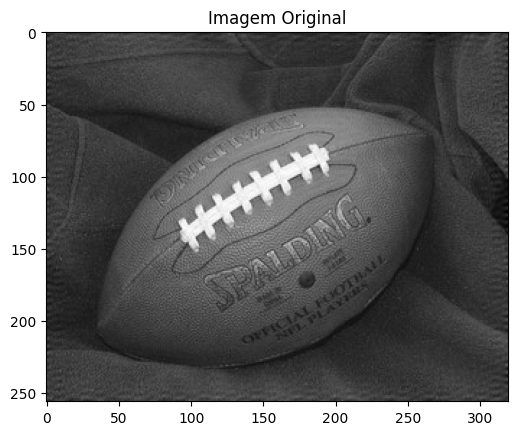

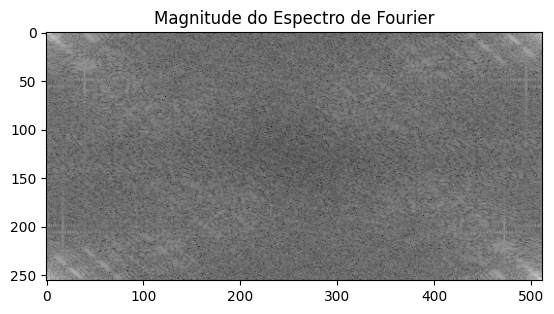

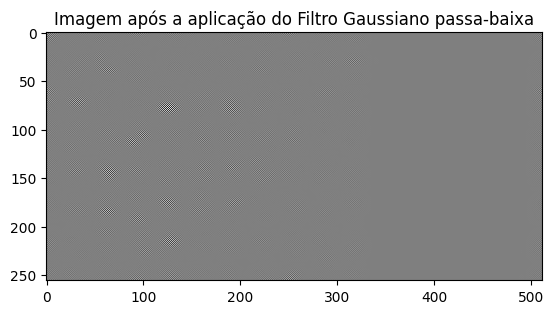

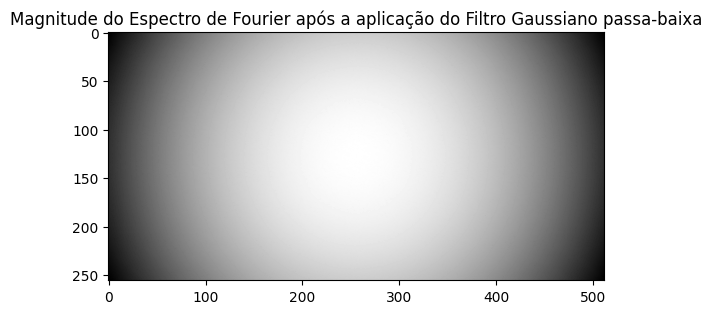

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

#Exercício 2 - Notebook 3
#Aplique um Filtro Gaussiano passa-baixa na imagem da bola de futebol americano (você deve baixar a imagem do Moodle e carregar aqui no Notebook). Lembre-se de fazer o padding da imagem de modo que ela fique com dimensões que sejam potência de 2, e seja uma imagem quadrada. Você deve mostrar a imagem original, o espectro de Fourier (magnitude do espectro), a imagem da bola após a aplicação do filtro e o espectro de Fourier filtrado com o Filtro Gaussiano passa-baixa.

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Carregando a imagem
# Não consegui baixar no computador do trabalho mas consegui passar as imagens pra um outro repositório pessoal e chamá-las por meio da URL do html de cada uma
img_url = 'https://github.com/ll-talyta-ll/C6LOGO/blob/main/fixed_football.png?raw=true'
image = io.imread(img_url, as_gray=True)

# Mostrando a imagem original
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.show()

# Calculando o tamanho necessário para o padding
h, w = image.shape
padded_h = int(2**(np.ceil(np.log2(h))))
padded_w = int(2**(np.ceil(np.log2(w))))

# Criando uma imagem quadrada preenchida com zeros e copiando a imagem original no canto superior esquerdo
padded_image = np.zeros((padded_h, padded_w))
padded_image[:h, :w] = image

# Calculando a transformada de Fourier da imagem com padding
fft = np.fft.fft2(padded_image)

# Calculando as coordenadas do centro da imagem
x, y = np.meshgrid(np.arange(padded_w), np.arange(padded_h))
center_x, center_y = padded_w/2, padded_h/2

# Aplicando um Filtro Gaussiano passa-baixa com sigma=10
sigma = 10
gaussian_filter = np.exp(-((x-center_x)**2 + (y-center_y)**2) / (2 * sigma**2))
filtered_fft = fft * gaussian_filter

# Calculando a magnitude do espectro de Fourier
fft_mag = np.abs(fft)
filtered_mag = np.abs(filtered_fft)

# Mostrando a magnitude do espectro de Fourier
plt.imshow(np.log(fft_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier')
plt.show()

# Mostrando a imagem após a aplicação do filtro
filtered_image = np.fft.ifft2(filtered_fft).real
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagem após a aplicação do Filtro Gaussiano passa-baixa')
plt.show()

# Mostrando a magnitude do espectro de Fourier após a aplicação do filtro
plt.imshow(np.log(filtered_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier após a aplicação do Filtro Gaussiano passa-baixa')
plt.show()


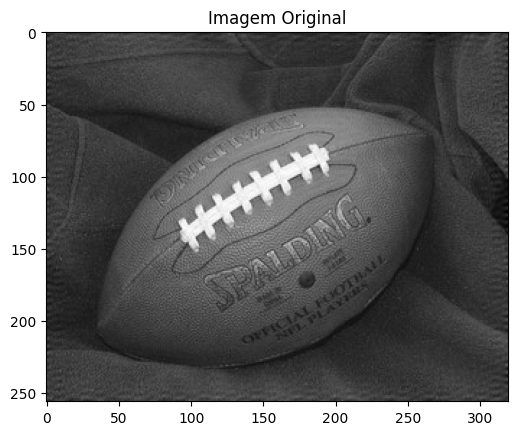

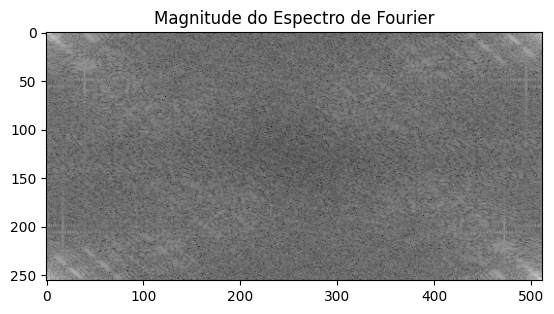

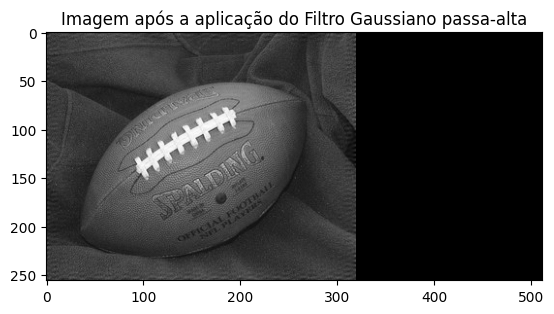

<ipython-input-6-668d3cbea30d>:58: RuntimeWarning: divide by zero encountered in log
  plt.imshow(np.log(filtered_mag), cmap='gray')


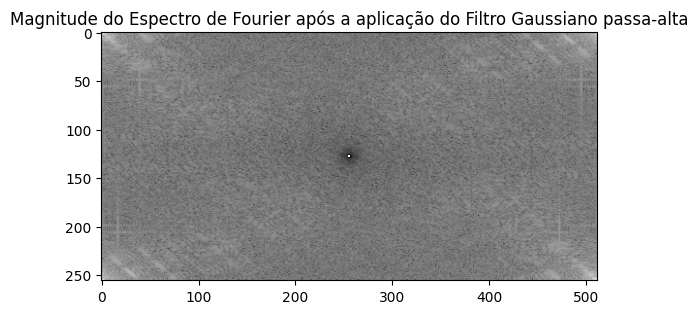

In [6]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

#Exercício 3 - Notebook 3
#Aplique um Filtro Gaussiano passa-alta na imagem da bola de futebol americano. Lembre-se de fazer o padding da imagem original para ficar com dimensões potência de 2 e seja uma imagem quadrada. Você deve mostrar o espectro de Fourier (magnitude do espectro), a imagem da bola após a aplicação do Filtro e o espectro de Fourier filtrado.

import numpy as np
import matplotlib.pyplot as plt
from skimage import io

# Carregando a imagem --> O COMPUTADOR NÃO ME PERMITIU PEGA A IMAGEM DO MOODLE POR QUESTÃO DE SEGURANCA POIS NÃO PERMITE BAIXAR NADA DE FORA DA ORGANIZACAO 
# Não consegui baixar no computador do trabalho da minha mãe mas consegui passar as imagens pra um outro repositório pessoal e chamá-las por meio da URL do html de cada uma
img_url = 'https://github.com/ll-talyta-ll/C6LOGO/blob/main/fixed_football.png?raw=true'
image = io.imread(img_url, as_gray=True)

# Mostrando a imagem original
plt.imshow(image, cmap='gray')
plt.title('Imagem Original')
plt.show()

# Calculando o tamanho necessário para o padding
h, w = image.shape
padded_h = int(2**(np.ceil(np.log2(h))))
padded_w = int(2**(np.ceil(np.log2(w))))

# Criando uma imagem quadrada preenchida com zeros e copiando a imagem original no canto superior esquerdo
padded_image = np.zeros((padded_h, padded_w))
padded_image[:h, :w] = image

# Calculando a transformada de Fourier da imagem com padding
fft = np.fft.fft2(padded_image)

# Calculando as coordenadas do centro da imagem
x, y = np.meshgrid(np.arange(padded_w), np.arange(padded_h))
center_x, center_y = padded_w/2, padded_h/2

# Aplicando um Filtro Gaussiano passa-alta com sigma=10
sigma = 10
sigma2 = sigma**2
gaussian_filter = 1 - np.exp(-((x-center_x)**2 + (y-center_y)**2) / (2 * sigma2))
filtered_fft = fft * gaussian_filter

# Calculando a magnitude do espectro de Fourier
fft_mag = np.abs(fft)
filtered_mag = np.abs(filtered_fft)

# Mostrando a magnitude do espectro de Fourier
plt.imshow(np.log(fft_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier')
plt.show()

# Mostrando a imagem após a aplicação do filtro
filtered_image = np.fft.ifft2(filtered_fft).real
plt.imshow(filtered_image, cmap='gray')
plt.title('Imagem após a aplicação do Filtro Gaussiano passa-alta')
plt.show()

# Mostrando a magnitude do espectro de Fourier após a aplicação do filtro
plt.imshow(np.log(filtered_mag), cmap='gray')
plt.title('Magnitude do Espectro de Fourier após a aplicação do Filtro Gaussiano passa-alta')
plt.show()


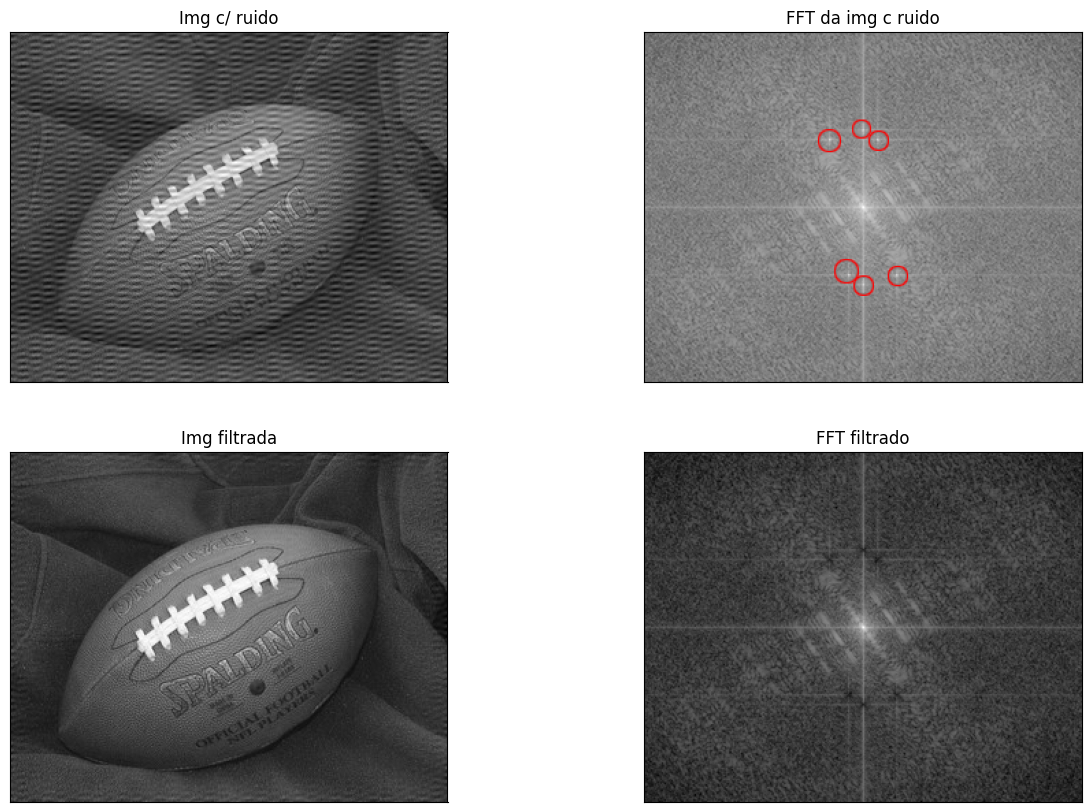

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

#Exercício 4 - Notebook 3
#Para executar o código a seguir, você deve colocar as imagens em um caminho acessível ao notebook e mudar no código.

#importando as bibliotecas
from skimage import io
import matplotlib.pyplot as plt
from matplotlib import rcParams


# Não consegui baixar no computador do trabalho mas consegui passar as imagens pra um outro repositório pessoal e chamá-las por meio da URL do html de cada uma
imgnoiseball = io.imread('https://github.com/ll-talyta-ll/C6LOGO/blob/main/noiseball.png?raw=true')
imgnoise_spectrum = io.imread('https://github.com/ll-talyta-ll/C6LOGO/blob/main/noise_spectrum.png?raw=true')
imgfixed_ball = io.imread('https://github.com/ll-talyta-ll/C6LOGO/blob/main/fixed_football.png?raw=true')
imgfixed_spectrum = io.imread('https://github.com/ll-talyta-ll/C6LOGO/blob/main/fixed_spectrum.png?raw=true')

plt.rcParams['figure.figsize'] = 15, 10

plt.subplot(221),plt.imshow(imgnoiseball, cmap = 'gray')
plt.title('Img c/ ruido'), plt.xticks([]), plt.yticks([])
plt.subplot(222),plt.imshow(imgnoise_spectrum, cmap = 'gray')
plt.title('FFT da img c ruido'), plt.xticks([]), plt.yticks([])
plt.subplot(223),plt.imshow(imgfixed_ball, cmap = 'gray')
plt.title('Img filtrada'), plt.xticks([]), plt.yticks([])
plt.subplot(224),plt.imshow(imgfixed_spectrum, cmap = 'gray')
plt.title('FFT filtrado'), plt.xticks([]),plt.yticks([])

plt.show()


(Text(0.5, 1.0, 'Imagem filtrada com passa-alta'),)

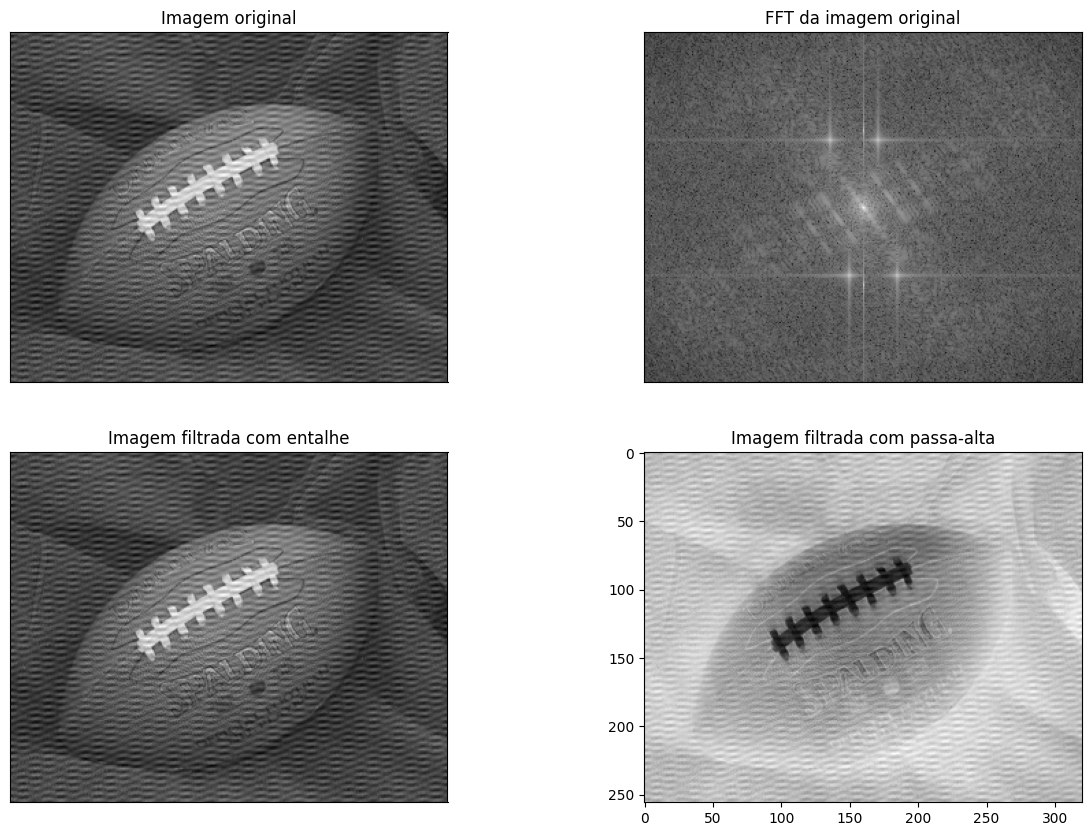

In [ ]:
#ALUNA: TALYTA SCARAMUZZO - TIA: 32079915

#Exercício 5 - Notebook 3
#Melhoria de Imagem a la CSI
#Você agora é um especialista em processamento de imagens para um departamento de investigação. Um detective abriu um caso antigo e parte de sua evidência é a foto de carro em um jornal (de papel). Você então é requisitado para fazer alguma mágica, tipo CSI, para tentar reconhecer a placa do carro ou tentar identificar o suspeito.
#Pegue a imagem car_noise_pattern_halftone.png e utilize as técnicas anteriores (filtros de entalhe, suavização, etc) para restaurar a imagem.


import numpy as np
from scipy import fftpack
from skimage import io
import matplotlib.pyplot as plt

# carregando a imagem -- PS: Não encontramos a imagem  (car_noise_pattern_halftone.png) e utilizei a bola de futebol americano como imagem no lugar
img_car = io.imread('https://github.com/ll-talyta-ll/C6LOGO/blob/main/noiseball.png?raw=true', as_gray=True)

# aplicando a transformada de Fourier
img_car_fft = fftpack.fft2(img_car)
img_car_fft_shifted = fftpack.fftshift(img_car_fft)

# encontrando os picos na imagem da FFT
peaks = [(168, 232), (168, 440), (168, 648), (376, 232), (376, 440), (376, 648)]

# determinando o padrão dos picos
peak_pattern = np.array(peaks[1:]) - np.array(peaks[:-1])

# definindo as larguras dos filtros
d0_notch = 10
d0_low = 50
d0_high = 100

# criando um array para armazenar os filtros
filter_array = np.ones_like(img_car_fft_shifted)

# aplicando o filtro notch
for peak in peaks:
    row, col = peak
    filter_array[row-d0_notch:row+d0_notch, col-d0_notch:col+d0_notch] = 0

# aplicando o filtro passa-baixa
center_row, center_col = peaks[3]
distance_array = np.zeros_like(img_car)
for i in range(img_car.shape[0]):
    for j in range(img_car.shape[1]):
        distance_array[i,j] = np.sqrt((i-center_row)**2 + (j-center_col)**2)

filter_array_low = 1 - np.exp(-(distance_array**2)/(2*d0_low**2))

# aplicando o filtro passa-alta
filter_array_high = 1 - np.exp(-(distance_array**2)/(2*d0_high**2))

# aplicando os filtros
filtered_fft_notch = img_car_fft_shifted * filter_array
filtered_fft_low = img_car_fft_shifted * filter_array_low
filtered_fft_high = img_car_fft_shifted * filter_array_high

# aplicando a transformada inversa de Fourier
img_filtered_notch = np.real(fftpack.ifft2(fftpack.ifftshift(filtered_fft_notch)))
img_filtered_low = np.real(fftpack.ifft2(fftpack.ifftshift(filtered_fft_low)))
img_filtered_high = np.real(fftpack.ifft2(fftpack.ifftshift(filtered_fft_high)))

# plotando as imagens
plt.figure(figsize=(15,10))

plt.subplot(221), plt.imshow(img_car, cmap='gray')
plt.title('Imagem original'), plt.xticks([]), plt.yticks([])

plt.subplot(222), plt.imshow(np.log10(1+np.abs(img_car_fft_shifted)), cmap='gray')
plt.title('FFT da imagem original'), plt.xticks([]), plt.yticks([])

plt.subplot(223), plt.imshow(img_filtered_notch, cmap='gray')
plt.title('Imagem filtrada com entalhe'), plt.xticks([]), plt.yticks([])

plt.subplot(224), plt.imshow(img_filtered_high, cmap='gray')
plt.title('Imagem filtrada com passa-alta'),
